# Project: Boston House Prices 


## Table of Contents:

* [1 Description](#Description)
* [2 Introduction](#Introduction)
* [3 Data Exploration](#Data-Exploration)
* [4 Processing the Data Set](#Processing-the-Data-Set)
* [5 Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [6 Correlation Matrix](#Correlation-Matrix)
* [7 Feature Selection](#Feature-Selection)
* [8 Feature Importance](#Feature-Importance)
* [9 Building the Model](#Building-the-Model)
* [10 Evaluation of the Model](#Evaluation-of-the-Model)
* [11 Model Performance](#Model-Performance)
* [12 Prediction](#Prediction)
* [13 Conclusion](#Conclusion)
    

---
##  Description

While working on this project, the main focus was to create a linear regression model which will predict the target variable, by following the statistical methods for the "Boston House Prices" data set. The starting point contains information about different aspects which can be taken in consideration while developing a model for house prices.

---
## Introduction


In this project can be reflected the process of creating the model which has been tested and trained. This has been done to predict the target value using a data set. The data set is related to the homes from the biggest city of Massachusetts which is also one of the oldest ones, Boston.

The data can be found on [Scikit-Learn site](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset) for which the original source is [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This information was collected in 1978 and the data set has 506 entries which represent the aggregated information with the 12 attributes for homes from various suburbs from Boston. It is important to mention from the start that the considered data set is a little bit different as on the recommended source there are 14 features, but I will work with the version which has fewer attributes.

The considered attributes are following:
 
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25 000 sq.ft.
- INDUS - proportion of non-residential business acred per town
- CHAS - Charles River dummy variable (=1 if tract bounds river; =0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of room per dwelling
- AGE - proportion of owner_occupied units built prior to 1940
- GARDEN_SIZE - proportion of the land which is represented by garden (even though this variable is not presented in the data source, I will work also with this variable for which the explanation is a logical assumption) 
- DIS - weighted distances to five Boston employment centres
- RAD - index of accesibility to radial highways
- TAX - full-value property-tax rate per \$ 10 000 
- TARGET - target attribute which has to be predicted with the model (even though the name of this variable is TARGET, I can assume the fact that this attribute is the MEDV variable from the original data set which represents median value of owner-occupied homes in  \$ 1 000's) 

Based on these attributes the model will be created, but there are some previous steps which have to be made.

Firstly, I will import the necessary libraries at this point, even though in the latest steps I will start accesing other libraries too.

In [1]:
# import the neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

# using %matplotlib inlin in order to show in the notebook the plots
%matplotlib inline 

# there will be some warning to show which will be ignored 
warnings.filterwarnings('ignore')

After the libraries have been imported, the data set with those 12 attributes has to be loaded.

In [2]:
# load Boston data set
boston = pd.read_csv('Technical_Interview_Dataset_2021.csv')

# get the first 5 rows from the data set
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,GARDEN_SIZE,DIS,RAD,TAX,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,17.40,1.8,1,296.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,15.96,1.8,2,242.0,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,23.82,1.8,2,242.0,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,23.04,1.8,3,222.0,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,24.72,1.8,3,222.0,36.2


As a starting point in the model which will be created, I will focus on predicting the value of *TARGET* which will be the response variable, while the other attributes will be the explanatory variables.

In [3]:
dep_var = boston['TARGET']
print(dep_var)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: TARGET, Length: 506, dtype: float64


In [4]:
indep_var = boston.drop('TARGET', axis = 1)
print(indep_var)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  GARDEN_SIZE  DIS  RAD  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2        17.40  1.8    1   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9        15.96  1.8    2   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1        23.82  1.8    2   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8        23.04  1.8    3   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2        24.72  1.8    3   
..       ...   ...    ...   ...    ...    ...   ...          ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1        16.44  1.8    1   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7        15.36  1.8    1   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0        17.34  1.8    1   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3        16.20  1.8    1   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8        10.14  1.8    1   

       TAX  
0    296.0  
1    242.0  
2    242.0  
3    222.0 

In [5]:
print('The data set has {} rows with {} attributes.'.format(*boston.shape))

The data set has 506 rows with 12 attributes.


Otherwise, before the actual creation of the model, the information privided by the data set has to be statistical analysed and explored. 

---
## Data Exploration

In the further steps, the data set will be explored to check the data because some mistakes or missing values can influence the final results and also the predictions made by the model.

Firstly, I will look up at a basic analysis to check for some misleading information.

In [6]:
# get the summary of statistical analysis
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,GARDEN_SIZE,DIS,RAD,TAX,TARGET
count,506.000000,506.000000,506.000000,506.000000,491.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,487.000000,506.000000
mean,3.563382,11.363636,11.136779,0.069170,0.554354,6.284634,68.574901,16.519684,1.800000e+00,9.549407,411.400411,22.532806
std,8.631769,23.322453,6.860353,0.253994,0.115381,0.702617,28.148861,5.518262,1.533624e-14,8.707259,169.716375,9.197104
min,-8.000000,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,6.000000,1.800000e+00,1.000000,187.000000,5.000000
25%,0.079870,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,13.215000,1.800000e+00,4.000000,280.500000,17.025000
50%,0.252775,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,15.720000,1.800000e+00,5.000000,330.000000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,18.000000,1.800000e+00,24.000000,666.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,33.000000,1.800000e+00,24.000000,711.000000,50.000000


By looking over the results from the statistical analysis, it is necessary to make the following observations:

- CRIM - for the *criminal rate* there is a minimum value of -8 which can not be possible because criminal rate is calculated as the number of crimes for every 100 000 individuals so it is not logical at all to have negative figures.
- DIS -  for the *distance to five Boston employment centres* there is the same value for each row (1.8), which I doubt is correct because here the subject is the suburbs from Boston so each suburb should have a different distance.

Also, I noticed that for *NAX* and *TAX* attributes there are fewer data by comparing to the rest of attributes, which is confirmed below.

In [7]:
# get info about each column
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          491 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   GARDEN_SIZE  506 non-null    float64
 8   DIS          506 non-null    float64
 9   RAD          506 non-null    int64  
 10  TAX          487 non-null    float64
 11  TARGET       506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


As it can be observed, attributes *CHAS* and *RAD* are  integers (both are indexes) and the rest of variables are floats. Also, for attributes *CHAS* and *TAX* there are some missing values due to empty cells which is revealed below as well.

In [8]:
# check for columns with empty values
boston.isnull().any()

CRIM           False
ZN             False
INDUS          False
CHAS           False
NOX             True
RM             False
AGE            False
GARDEN_SIZE    False
DIS            False
RAD            False
TAX             True
TARGET         False
dtype: bool

Therefore, there are two attributes which have some empty values (15 missing values for *NOX* attribute and 19 values for *TAX* attribute). 

In the next section, I will handle the missing or questionable values for *CRIM*, *NOX*, *RAD*, *TAX* attributes.


---
## Processing the Data Set

Because I observed the fact there are some issues with the data set in the previous section, I will handle each identified problem and make changes accordingly where these can be done. Regarding the missing values, the options are to remove the rows or to use an imputation technique (based on mean, mode, median). On the other hand, for the attributes where the data is questionable, I will have to investigate and find a solution. Even though removing the columns or rows with the issues is the easier way to solve it, I will try to find other solutions.

### Criminal Rate 

Regarding attribute *CRIM* which represents the *criminal rate* I observed there is a negative minimum value from the descriptive analysis, which seems strange as there is no way that the criminal rate will get negative values. In order to better understand the situation, I have to identify the cases for which this situation is encountered.

In [9]:
#finding the rows for which the condition is met
crim0_boston = boston.loc[boston['CRIM'] < 0] 
print(crim0_boston)

     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  GARDEN_SIZE  DIS  RAD  \
84   -1.0   0.0   4.49     0  0.449  6.389  48.0        17.34  1.8    3   
355  -8.0  80.0   1.91     0  0.413  5.936  19.5        15.36  1.8    4   
484  -6.0   0.0  18.10     0  0.583  5.871  41.9        15.36  1.8   24   
487  -3.0   0.0  18.10     0  0.583  5.905  53.2        15.36  1.8   24   

       TAX  TARGET  
84   247.0    23.9  
355  334.0    20.6  
484  666.0    20.6  
487  666.0    20.6  


There are 4 rows for which criminal rate is negative, which are quite a few by comparing to the overall number of rows 506 so deleting these will not influence a lot the results. Because there is no way to obtain these figures by calculating them (the other attributes do not offer the necessary information, e.g number of crimes and population), these 4 rows will be eliminated completely.

In [10]:
#create a duplicate of the original data set
boston_crim = boston 
print(boston_crim)

#delete the rows with negative CRIM
for row in boston_crim.index:
    if boston_crim.loc[row,'CRIM'] < 0:
        boston_crim.drop(row, inplace = True)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  GARDEN_SIZE  DIS  RAD  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2        17.40  1.8    1   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9        15.96  1.8    2   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1        23.82  1.8    2   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8        23.04  1.8    3   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2        24.72  1.8    3   
..       ...   ...    ...   ...    ...    ...   ...          ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1        16.44  1.8    1   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7        15.36  1.8    1   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0        17.34  1.8    1   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3        16.20  1.8    1   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8        10.14  1.8    1   

       TAX  TARGET  
0    296.0    24.0  
1    242.0    21.6  


As it can be observed, the data set now has fewer rows (502) from the initial state so the removal has been successfully done. As a verification, I can get the statistical table for the new data set. 

In [11]:
# statistical analysis
boston_crim.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,GARDEN_SIZE,DIS,RAD,TAX,TARGET
count,502.000000,502.000000,502.000000,502.000000,487.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000,483.000000,502.000000
mean,3.627632,11.294821,11.140657,0.069721,0.554743,6.286701,68.797410,16.524980,1.800000e+00,9.515936,410.846791,22.541633
std,8.632565,23.196951,6.854817,0.254930,0.115564,0.704780,28.126338,5.539397,1.511409e-14,8.685613,169.425222,9.232328
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,6.000000,1.800000e+00,1.000000,187.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,13.110000,1.800000e+00,4.000000,280.500000,16.850000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.750000,15.720000,1.800000e+00,5.000000,330.000000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.628000,94.100000,18.000000,1.800000e+00,24.000000,666.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,33.000000,1.800000e+00,24.000000,711.000000,50.000000


By looking at the statistics of the new data set, for *CRIM* attribute there is no negative minimum, which means that the correction has been made and those 4 rows has been eliminated and now the data set has 502 rows.

In [12]:
print('The data set has {} rows with {} attributes.'.format(*boston_crim.shape))

The data set has 502 rows with 12 attributes.


As a mention the new data set will be taken in consideration for further steps, so the next changes will be made on *boston_crim*.

### Nitric Oxides Concentration

For the attribute *NOX* which represents the *nitric oxides concentration* it was observed in the previous section that there are 15 missing values. Even though that one of the solution is to remove the rows for which attribute does not have values, I will chose to use an imputation technique.

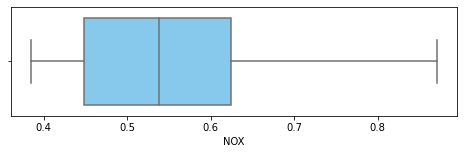

In [13]:
# create the boxplot
fig, ax = plt.subplots(figsize=(8,2))
sns.boxplot(boston_crim.NOX, orient = 'h',color = '#76CEFE');

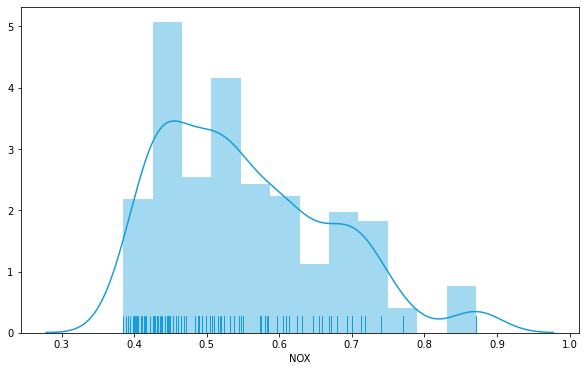

In [14]:
# create the distribution plot
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(boston_crim.NOX, color = '#179EDA', vertical = False, rug = 'True', bins = 12);

By looking at the boxplot and as well at the distribution plot, it can be observed that the data is positive skewed, which is why the mean option in order to solve the issue is eliminated. The left options are the mean or mode option, from which I will choose the mode which is the most frequent value from the column *NOX*.

In [15]:
# fill the empty cells with the mode 
boston_nox = boston_crim
nox_mode = boston_nox['NOX'].mode()[0]
boston_nox['NOX'].fillna(nox_mode, inplace = True)

# check if the problem was solved
boston_nox.isnull().any()

CRIM           False
ZN             False
INDUS          False
CHAS           False
NOX            False
RM             False
AGE            False
GARDEN_SIZE    False
DIS            False
RAD            False
TAX             True
TARGET         False
dtype: bool

As it can be observed the issue is solved as the column for *nitric oxides concentration* has no longer empty values.

In [16]:
print('The data set has {} rows with {} attributes.'.format(*boston_nox.shape))

The data set has 502 rows with 12 attributes.


The number of rows and columns did not change from the latest change because there has not been done any removal of rows as I choosed to use an imputation technique.

###  Weighted distance to employment centres

Regarding the attribute *DIS* which represents the *weighted distance to the employment centers*, it was observed that the unique value of 1.8 is for all the Boston  suburbs, which does not seem resonable as there should be different distances. 

Based on this the only option is the removal of the whole column, as there is no other information based on which I would calculate these distances (no information about where this exployment centers are or other distances).

In [17]:
# remove the DIS column
boston_dis = boston_nox.drop('DIS', axis = 1)
boston_dis.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,GARDEN_SIZE,RAD,TAX,TARGET
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,483.000000,502.000000
mean,3.627632,11.294821,11.140657,0.069721,0.554242,6.286701,68.797410,16.524980,9.515936,410.846791,22.541633
std,8.632565,23.196951,6.854817,0.254930,0.113856,0.704780,28.126338,5.539397,8.685613,169.425222,9.232328
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,6.000000,1.000000,187.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.885500,45.175000,13.110000,4.000000,280.500000,16.850000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.750000,15.720000,5.000000,330.000000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.628000,94.100000,18.000000,24.000000,666.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,33.000000,24.000000,711.000000,50.000000


By looking at the statistical table, it can be noticed that there is no longer the column *DIS* which reflected the distance to the employment centers in Boston.

In [18]:
print('The data set has {} rows with {} attributes.'.format(*boston_dis.shape))

The data set has 502 rows with 11 attributes.


The change can be observed by the fact that now the data set has now 11 attributes, while keeping the same number of rows.

### Full-value property-tax 

For the attribute *full-value property-tax per \$ 10 000* which is found under abbreviation *TAX* it was noticed in the previous section that there are 19 missing values. I will solve this similar to the used approach for *NOX* attribute, but firstly I will analyse the graphic representation (boxplot and distribution plot).

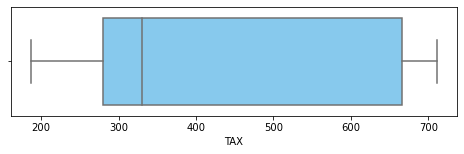

In [19]:
fig, ax = plt.subplots(figsize=(8,2))
sns.boxplot(boston_dis.TAX, orient = 'h',color = '#76CEFE');

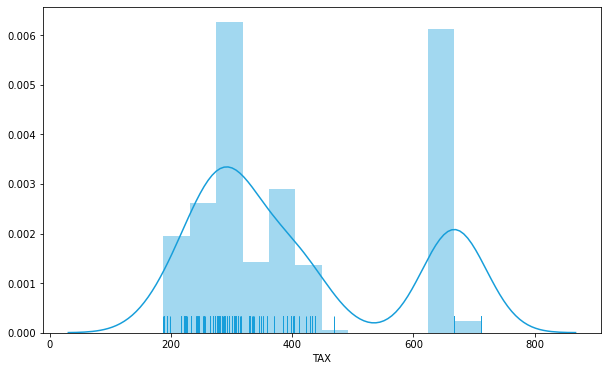

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(boston_dis.TAX,  color = '#179EDA', vertical = False, rug = 'True', bins = 12);

In order to solve this issue, I will use an imputation technique based on mode as it follows.

In [21]:
# fill the empty cells with the mode 
boston_tax = boston_dis
tax_mode = boston_tax['TAX'].mode()[0]
boston_tax['TAX'].fillna(tax_mode, inplace = True)

# check if the issue is solved
boston_tax.isnull().any()

CRIM           False
ZN             False
INDUS          False
CHAS           False
NOX            False
RM             False
AGE            False
GARDEN_SIZE    False
RAD            False
TAX            False
TARGET         False
dtype: bool

As it can observed from above, now there is no empty cell in the data set, which is favourable for going to the next step in the flow of developing a model.

In [22]:
# get the statistical summary
boston_tax.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,GARDEN_SIZE,RAD,TAX,TARGET
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,3.627632,11.294821,11.140657,0.069721,0.554242,6.286701,68.797410,16.524980,9.515936,420.503984,22.541633
std,8.632565,23.196951,6.854817,0.254930,0.113856,0.704780,28.126338,5.539397,8.685613,173.181498,9.232328
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,6.000000,1.000000,187.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.885500,45.175000,13.110000,4.000000,284.000000,16.850000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.750000,15.720000,5.000000,348.000000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.628000,94.100000,18.000000,24.000000,666.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,33.000000,24.000000,711.000000,50.000000


As it can be observed, now all the columns have the same number of values and there is no empty cell.

In [23]:
# the final data set 
boston_final = boston_tax
print('The data set has {} rows with {} attributes.'.format(*boston_final.shape))

The data set has 502 rows with 11 attributes.


The number of rows and columns did not change because it was only made a change of missing cells on *TAX* column.
The final version of the data set is can be found as *boston_final* for which there are 502 rows and 11 attributes.

---
## Exploratory Data Analysis



After getting the final version of the data set, an important aspect is the exploratory data analysis in order to check skewness of each variable as it follows.

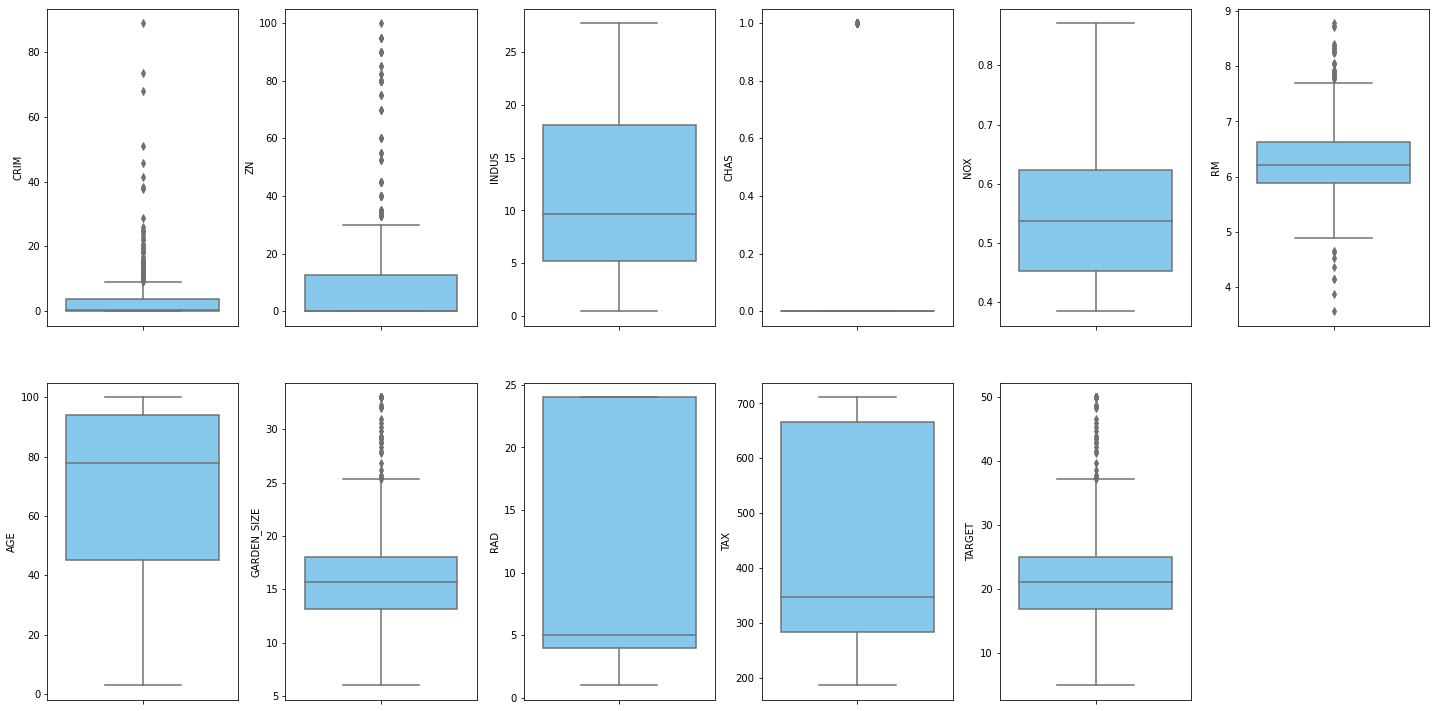

In [24]:
# create box plots
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in boston_final.items():
    sns.boxplot(y = col, data = boston_final, ax = ax[index], color = '#76CEFE')
    index += 1

#arrange the layout of the boxplots
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0) 

# eliminate the empty boxplot 
ax[11].set_axis_off() 

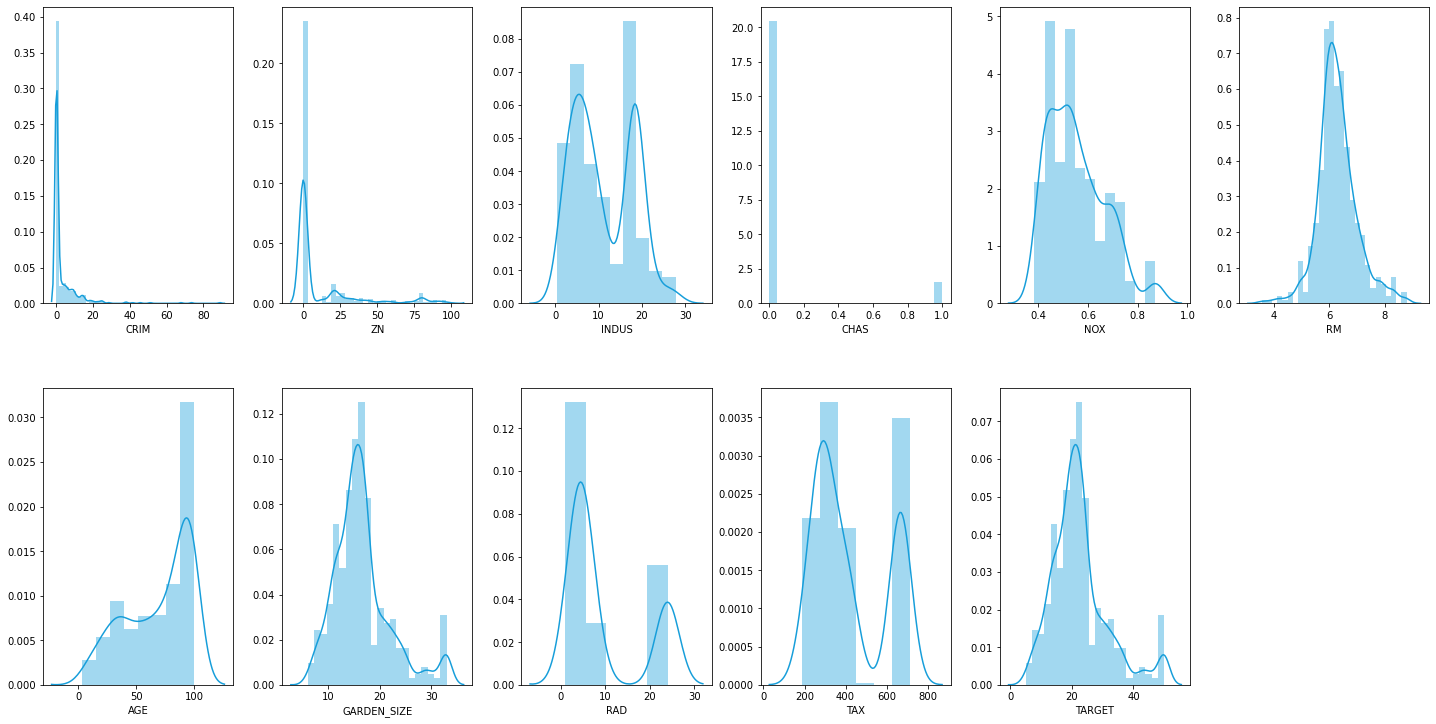

In [25]:
# create dist plots
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in boston_final.items():
    sns.distplot(value, ax = ax[index], color = '#179EDA')
    index += 1

#arrange the layout of the displots
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0) 

# eliminate the empty boxplot
ax[11].set_axis_off()  

By looking at both boxplots and distributionn plots there are multiple observations which have to be done. Firstly, on *CRIM* and *ZN* lots of outliers have been noticed (which means that it can not follow a normal distribution so it might be a good solution to transform it by log). Also, these variables has positive skewness which means that most of the figures are around the left tail of the distribution.

For variables *TARGET*, *GARDEN_SIZE*, *NOX* there is a tendancy to get a normal distribution more than being a right skewed distribution. Also, *RM* follows a normal distribution for sure.

Regarding the categorical attribute *CHAS* it can be observed that most of the values are 0 with few ones which are 1, that means there is not such a big contribution this variable can give so it might be an option to drop it.

The attribute *AGE* has a negative skewness as more values can be found on the right tail.

An interesting situation is present in the case of attributes *INDUS*, *RAD*, *TAX* where it can be identified a bimodal distribution.


---
## Correlation Matrix


Another important aspect is the possible existence of correlation between variables, as a perfect correlation (nor positive or negative) can include multicollinearity. In order to analyse the relationship between attributes I will creata a correlation matrix which is presented below.

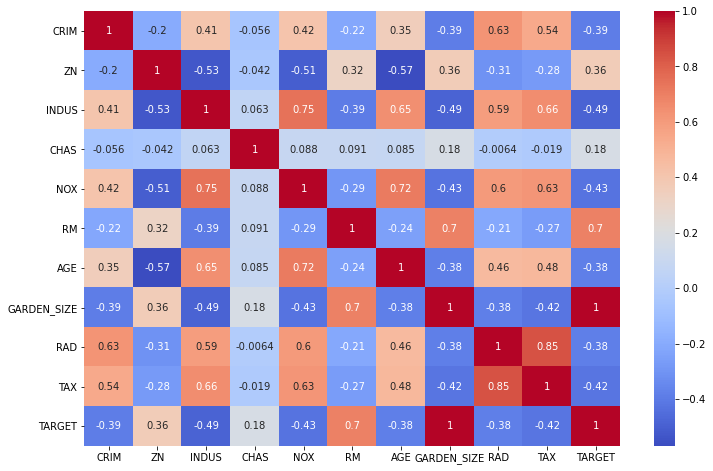

In [26]:
# create the correlation matrix
corr = boston_final.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm');

By looking at the *TARGET* attribute for which I will develop the model it can observed that it has a perfect positive correlation with *GARDEN_SIZE*. Also, a  positive relationship it can be also observed with *RM* which is quite strong (0.7), but not as strong as the one with *GARDEN_SIZE* variable. A positive correlation for *TARGET* can be identified also with *ZN* and *CHAS*. Otherwise, for the rest of the attributes there is a moderate negative correlation with the *TARGET* variable.

It can be observed that variable *CHAR* presents nearly no relationship with any other variable which is why this attribute will be excluded as it just decreases the future model accuracy.

Also, as an overview it can be noticed there is a strong positive relationship between *RAD* and *TAX* variables.

The strong relationship between the dependent variable *TARGET* and *GARDEN_SIZE*, respectively *RM* can be observed also from the graphical representations from below.

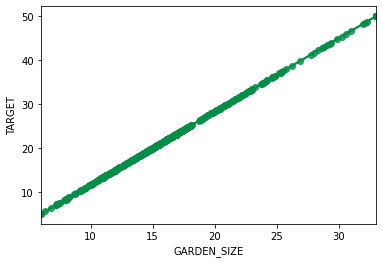

In [27]:
# plot of *TARGET* and *GARDEN_SIZE*
sns.regplot(y = boston_final['TARGET'], x = boston_final['GARDEN_SIZE'],color = '#008E46');

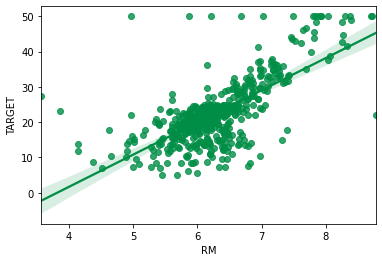

In [28]:
# plot of TARGET and RM
sns.regplot(y = boston_final['TARGET'], x = boston_final['RM'], color = '#008E46');

As it can be observed, the positive relationship between *TARGET* and *RM* implies that when the number of rooms increases the target variable increases as well. This gives some orientation about the fact that the dependent variable is related to the value of a house because it is known the fact that the number of rooms is related to the amount of money someone has to pay for a house.

On the same note, regarding the relationship with variable *GARDEN_SIZE* it seems that as the garden size increases the price of the house increases. The fact that this relationship is much stronger can imply also the fact that more than the number of rooms a house has, an important aspect is also the size of the garden.

---
## Feature Selection

As it was observed from the previous section there are variables which have different influence one over another, which is why it can be difficult to choose the attributes which will remain before creating the model. Using feature selection I will select the attributes which will perfectly contribute to the prediction of variable *TARGET* which is the objective of this project. This is necessary because the existence of some variables can decrease the accuracy of the model.

In [29]:
# import for selecting features with the highest values from test chi sq
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
x = boston_final.iloc[:,0:11] #independent variables
y = boston_final.iloc[:,-1] #dependent variable
y = np.round(boston_final['TARGET']) 
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  GARDEN_SIZE  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2        17.40    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9        15.96    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1        23.82    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8        23.04    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2        24.72    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...          ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1        16.44    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7        15.36    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0        17.34    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3        16.20    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8        10.14    1  273.0   

     TARGET  
0      24.0  
1      21.6

After this, I will find the best features from the current data set which will form the modelling data set.

In [30]:
# get the best features
top_feat = SelectKBest(score_func=chi2, k=5)
fit = top_feat.fit(x,y)
boston_scores = pd.DataFrame(fit.scores_)
boston_columns = pd.DataFrame(x.columns)

feat_scores = pd.concat([boston_columns, boston_scores], axis = 1)
feat_scores.columns = ['Attribute','Score']
feat_scores

,Attribute,Score
0,CRIM,5478.103777
1,ZN,6024.062718
2,INDUS,870.842399
3,CHAS,58.412381
4,NOX,4.638428
5,RM,21.915153
6,AGE,2386.797617
7,GARDEN_SIZE,929.487579
8,RAD,1452.134360
9,TAX,13452.862635


The results are presented above, but these should be put in order to better understand the scores.

In [31]:
#print the most 10 favourable features in order
print(feat_scores.nlargest(10,'Score')) 

      Attribute         Score
9           TAX  13452.862635
1            ZN   6024.062718
0          CRIM   5478.103777
6           AGE   2386.797617
10       TARGET   1892.764799
8           RAD   1452.134360
7   GARDEN_SIZE    929.487579
2         INDUS    870.842399
3          CHAS     58.412381
5            RM     21.915153


As it can be noticed, the variables with the best scores are the following: *TAX*,*ZN*, *CRIM*, *AGE*. Otherwise, in the following section I will find out which attribute would have a greater impact in predicting the *TARGET* variable.


---
## Feature Importance

After obtaining the most 10 favourable attributes from the data set, I will investigate the usefulness of all the attributes in predicting the dependent variable using Extremely Randomized Trees Classifier.

In [32]:
# use ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
boston_model = ExtraTreesClassifier()
boston_model.fit(x,y)
print(boston_model.feature_importances_)

[0.06567683 0.01839209 0.03319686 0.0097818  0.04816189 0.07864127
 0.07323485 0.30259291 0.03010683 0.03128798 0.3089267 ]


We got the classification coefficients, but in order to better understand these results I will do a graphic representation.

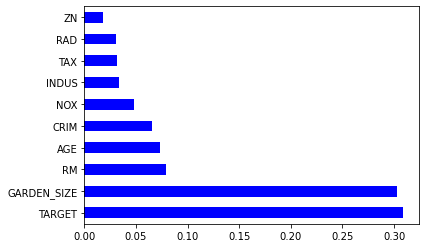

In [33]:
# graphic representation of ExtraTreesClassifier
feat_impor = pd.Series(boston_model.feature_importances_, index=x.columns)
feat_impor.nlargest(10).plot(kind='barh', color = 'blue')
plt.show()

As a result of these type of analysis, a decision has to be made regarding the variables which will remain for the building of the model. Considering this method, but also the correlation matrix observations I decide to keep only the variables *CRIM*, *AGE*, *TAX*, *RM* for predicting the value of *TARGET*.

---
## Building the Model

In the following sections I will present the techniques used to make the prediction of *TARGET* variable.

The model which will be used is based on linear regression. In this section I will create the split in train data set and test data set.

In [34]:
# establish the variables which will be taken in consideration 
x = boston_final[['CRIM','AGE','TAX','RM']]
y = boston_final['TARGET']
print(x)

# split the data in traing data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 

        CRIM   AGE    TAX     RM
0    0.00632  65.2  296.0  6.575
1    0.02731  78.9  242.0  6.421
2    0.02729  61.1  242.0  7.185
3    0.03237  45.8  222.0  6.998
4    0.06905  54.2  222.0  7.147
..       ...   ...    ...    ...
501  0.06263  69.1  273.0  6.593
502  0.04527  76.7  273.0  6.120
503  0.06076  91.0  273.0  6.976
504  0.10959  89.3  273.0  6.794
505  0.04741  80.8  273.0  6.030

[502 rows x 4 columns]


After spliting the data in two sections (where I set the test size to 0.3), I will have to import the library for regression and start training the model with training sets.

In [35]:
# import the library for regression
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()

# train the model with training sets
model_lin.fit(x_train,y_train)

LinearRegression()

Below the coeffiecients for each variable are presented.

In [36]:
# values of the coefficient for each variable
coeff = pd.DataFrame([x_train.columns,model_lin.coef_]).T
coeff = coeff.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeff

,Attribute,Coefficients
0,CRIM,-0.16546
1,AGE,-0.0383029
2,TAX,-0.00468716
3,RM,8.32469


By looking above, it can be observed and confirmed the positive relationship between the *TARGET* variable and the average number of rooms. So, at an increase in the average number of rooms with one unit, the *TARGET* variable will increase with around 8 units.

The rest of the variables have a negative relationship with the dependent variable. For example, at an increase in the criminal rate with one unit, there will be a decrease in the *TARGET* value. This can be explained because if the *TARGET* value represents the price of a house, it seems normal to have smaller prices for houses in places where criminal rate is big. 

---
## Evaluation of the Model

In this section the created model will be evaluated by looking at some statistical measurements of the quality of a model.

In [37]:
# prediction on training data
y_prediction = model_lin.predict(x_train)

In [38]:
# evaluation of the model with the basic indicators
from sklearn import metrics
print('R2:',metrics.r2_score(y_train, y_prediction))
print('Adjusted R2:',1 - (1-metrics.r2_score(y_train, y_prediction))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_prediction))
print('MSE:',metrics.mean_squared_error(y_train, y_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_prediction)))

R2: 0.5707846465834718
Adjusted R2: 0.5658226193763443
MAE: 3.9992119707510327
MSE: 38.41200181229456
RMSE: 6.197741670342074


By looking at the statistical indices from above, it can be said that the model is far from being perfect. The value of 0.57 for R-squared means that only 57% of the influence on the dependent variable *TARGET* is explained by this model. This value can be improved by following steps like the following: remove ouliers, get a bigger data set, more features or other representative attributes.

Regarding the root mean squared error, the value is of 6.2 which reflect an error from the actual figure for *TARGET* attribute.

---
## Model Performance

Another way to analyse the model is by its performance which can be reflected by comparing the score for training and testing data. 

In [39]:
print("Training:",model_lin.score(x_train,y_train)*100)
print("Testing:",model_lin.score(x_test,y_test)*100)

Training: 57.07846465834719
Testing: 56.675158586637586


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
print("Model Accuracy:",r2_score(y,model_lin.predict(x))*100)

Model Accuracy: 57.07335266554535


Also, in order to better understand the differences between the actual values for *TARGET* variable and the predicted ones, I will make a graphic representation.

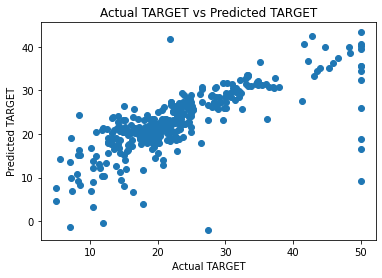

In [41]:
# differences between actual and predicted values for target variable
plt.scatter(y_train, y_prediction)
plt.xlabel("Actual TARGET")
plt.ylabel("Predicted TARGET")
plt.title("Actual TARGET vs Predicted TARGET")
plt.show()

Another point of view of this analysis is the overview of the residuals.

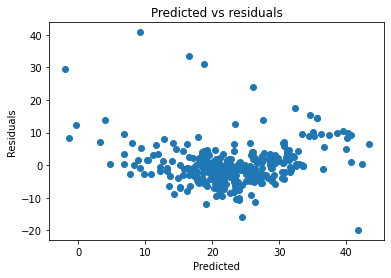

In [42]:
# check residuals
plt.scatter(y_prediction,y_train-y_prediction);
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

From the above graph it can be noticed that a big amount is around 0 which is good, but not exactly the best model.

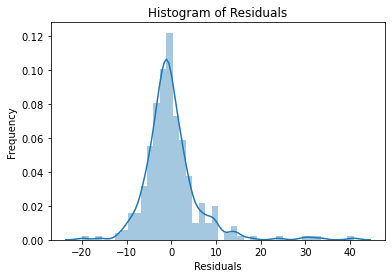

In [43]:
# Checking Normality of errors
sns.distplot(y_train-y_prediction)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Regarding the normality of residuals, in the above representation it can be noticed that these residuals are somehow between a normal distribution and a right skewed representation, which also confirms the fact that this model is not the perfect one for the data set.

---
## Prediction

If I were to assume a possible way this model can be used, it might be helpful for real estate agent or a person which is interested in selling a house, but does not know which price would be the most fair. Let's assume the following two potential customers with the following attributes:

|Feature||Customer 1||Customer 2|
|----||----||----|
|Criminal rate||0.1||1|
|Age ||10||50|
|Tax||300||200|
|Rooms in the house||8||5|

Based on these attributes, it can be expected that the for the first house the buyer would pay more money than for the second one, as he is expecting to find a house in an area with low criminal rate, a relative new house, for which he will pay more taxes and will have more rooms. But this theory will be checked after using the created model.

In [44]:
# assume a matrix with the following info
potential_customer = [[0.1, 10, 300, 8], 
                      [1, 50, 250,5]] 
          
# Show predictions
for i, target in enumerate(model_lin.predict(potential_customer)):
    print("Predicted target for Customer {}'s home: {:,.2f}".format(i+1, target))

Predicted target for Customer 1's home: 40.36
Predicted target for Customer 2's home: 13.94


As expected, a home which fits the profile for the first customer can cost around 40 units (here it deppends if in the data set the *TARGET* attribute is expressed in thousands or millions), while for the second customer may cost around 14 units. So, a house with more favourable characteristics will have a bigger price than the one with less rooms for example.

---
## Conclusion

In this project, I proposed a model in order to predict the variable *TARGET* from the Boston House Prices data set. I have done this by using the most basic model which could have been created (linear regression). The results obtained are good, but not the best as only 57% of the dependent variable was explained by the model. There are a lot of improvements that can be made by starting from this point. For example, alternatives to Linear Regression are Decision Tree Regressor, Random Forest Regressor, XGB Regressor or Extra Trees Regressor. Also, the differences can appear by the used techniques in cleaning the data and the criteria used to choose the variables which will be included in the model.

Otherwise, the model showed the fact that if a person wants a house with many rooms should be prepared for the price to increase as the number of rooms increase. Also, if a client wants to buy a house in a safe area where the criminal rate is low, then it should expect to pay more money. On the other hand, the market should expect that the customers would pay less money for a house which has been build before 1940.

Also, in order to show the way this model can be used, I assumed there are two customer with different expectations and they wish to find out a price for the house. As it was observed the model seems to be useful as the results of the prediction meet the expectation. Otherwise, this model can be changed and developed in order to be a better fit depending on the person interested in using it (real estate agent, customer).